<a href="https://colab.research.google.com/github/snigdhaaleti/learning/blob/main/Copy_of_Cyber_bullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import essential libraries

**Detecting Cyber-bullying in text**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import dataset for cyber-bullying

In [3]:
from google.colab import files #to import local files from pc
files.upload() #to upload files from pc

Saving cyber_data.csv to cyber_data.csv
Saving cyber_data2.csv to cyber_data2.csv


{'cyber_data.csv': b'\xef\xbb\xbflabel,full_text\r\nNon-offensive,!!! RT @mayasolovely: As a woman you shouldn\'t complain about cleaning up your house. &amp; as a man you should always take the trash out...\r\nOffensive,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!\r\nOffensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit\r\nOffensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny\r\nOffensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;\r\nOffensive,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""\r\nOffensive,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"""\r\nOffensive,!!!!&#8220;@selfiequ

In [4]:
data1=pd.read_csv('cyber_data.csv')
data2=pd.read_csv('cyber_data2.csv')
data2.head()

id      label                                          full_text
0  5.723430e+17  Offensive  So Drasko just said he was impressed the girls...
1  5.723430e+17  Offensive  So Drasko just said he was impressed the girls...
2  5.723410e+17  Offensive  Drasko they didn't cook half a bird you idiot ...
3  5.723410e+17  Offensive  Drasko they didn't cook half a bird you idiot ...
4  5.723400e+17  Offensive  Hopefully someone cooks Drasko in the next ep ...

In [5]:
# data2=data2.drop_duplicates(inplace=True)
del data2['id']
data2.head()

label                                          full_text
0  Offensive  So Drasko just said he was impressed the girls...
1  Offensive  So Drasko just said he was impressed the girls...
2  Offensive  Drasko they didn't cook half a bird you idiot ...
3  Offensive  Drasko they didn't cook half a bird you idiot ...
4  Offensive  Hopefully someone cooks Drasko in the next ep ...

In [6]:
data1.head()

label                                          full_text
0  Non-offensive  !!! RT @mayasolovely: As a woman you shouldn't...
1      Offensive  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      Offensive  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      Offensive  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      Offensive  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

Combining two dataframes 

In [7]:
data=pd.concat([data1,data2])
data.shape

(35873, 2)

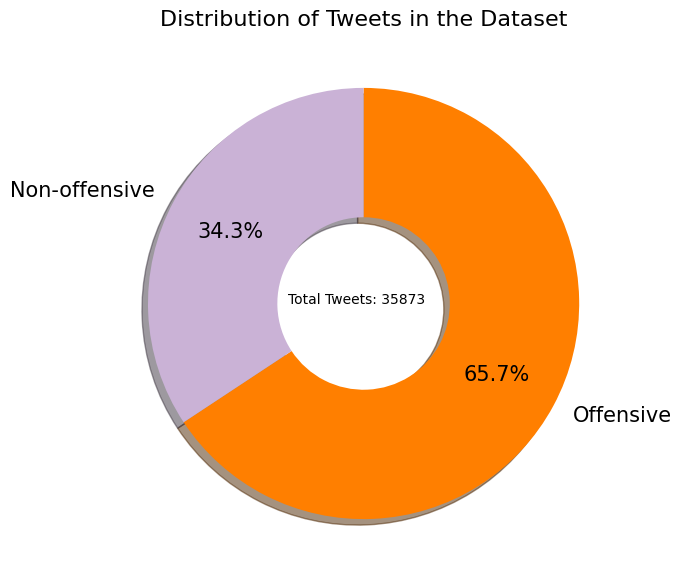

In [8]:
plt.figure(figsize = (7,7))
sorted_counts = data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(data.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [9]:
data['label']=data.label.map({'Offensive':1,'Non-offensive':0}) # encoding output
data['label'].value_counts()

1    23574
0    12299
Name: label, dtype: int64

Now its time for text preprocessing.
In order to deal with text we have to install NLTK library and their dependencies

In [10]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
# print(stopwords.words('english'))
!pip install -q wordcloud
import wordcloud
# import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))


nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [13]:
!pip install transformers
import re
import nltk
from bs4 import BeautifulSoup
from transformers import AutoTokenizer

def clean_sentences(df):
    # Load pre-trained tokenizer
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    
    # Remove HTML tags and non-alphabetic characters
    pattern = re.compile(r'<[^>]+>|[^a-zA-Z]+')
    
    # Remove stop words and lemmatize
    stops = set(nltk.corpus.stopwords.words("english"))
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Tokenize and clean each sentence
    reviews = [tokenizer.tokenize(pattern.sub(" ", sent.lower().strip())) for sent in df['full_text']]
    reviews = [[lemmatizer.lemmatize(word) for word in sent if word not in stops] for sent in reviews]
    reviews = [" ".join(sent) for sent in reviews]

    return reviews

data['untokenized_text'] = clean_sentences(data)
data.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.5 MB/s eta 0:00:00


label                                          full_text  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    untokenized_text  
0  rt maya ##sol ##ove ##ly woman complain cleani...  
1  rt ml ##ee ##w boy dat ##s cold ty ##ga ##wn b...  
2  rt ur ##kind ##of ##brand da ##wg rt sb ##aby ...  
3     rt c g anderson viva based look like tran ##ny  
4  rt shen ##ika ##ro ##bert ##s shit hear might ...

In [14]:
offensive=data[data['label']==1]
nonoffensive=data[data['label']==0]

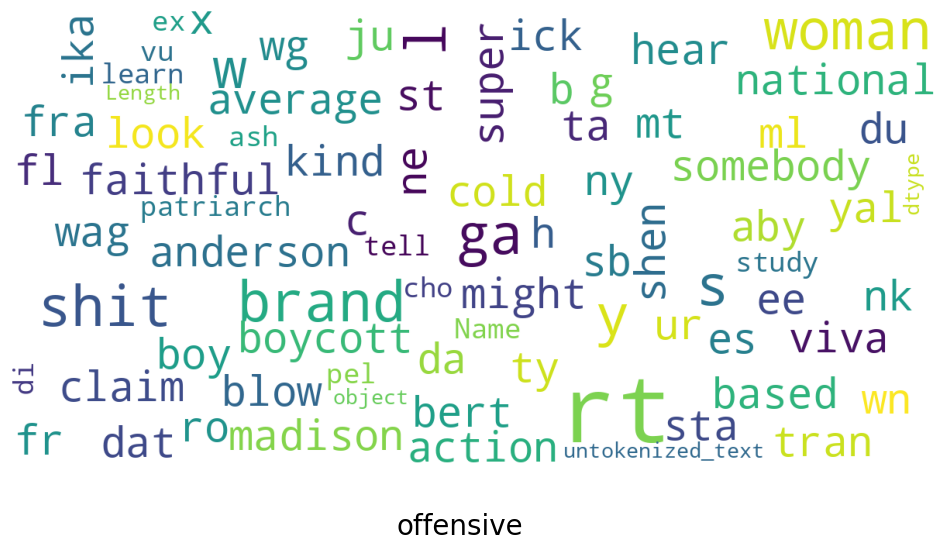

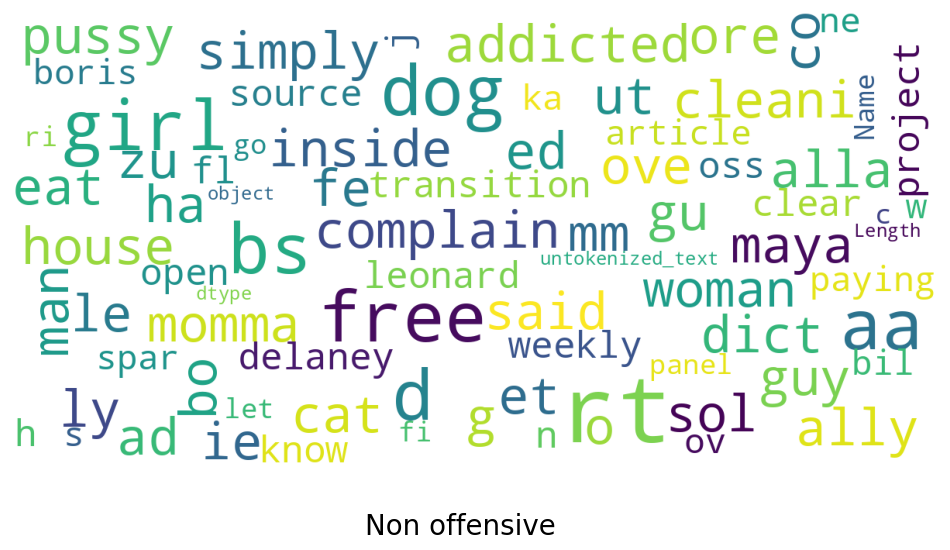

In [15]:
from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title ):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(offensive['untokenized_text'],'offensive')
print('\n\n\n')
show_wordcloud(nonoffensive['untokenized_text'],'Non offensive')

In [18]:
def clean_sentences(df):
    reviews = [re.sub("[^a-zA-Z]"," ", BeautifulSoup(sent).get_text()) for sent in df['untokenized_text']]
    return reviews

data['untokenized_text'] = clean_sentences(data)


In [19]:
# data=pd.read_csv('cyber_cleandata (1).csv')
# data=data.drop(columns=['Unnamed: 0','full_text'])
# data=data.dropna()
data.head()

label                                          full_text  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    untokenized_text  
0  rt maya   sol   ove   ly woman complain cleani...  
1  rt ml   ee   w boy dat   s cold ty   ga   wn b...  
2  rt ur   kind   of   brand da   wg rt sb   aby ...  
3     rt c g anderson viva based look like tran   ny  
4  rt shen   ika   ro   bert   s shit hear might ...

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['untokenized_text'],data['label'],stratify=data['label'],random_state=42,test_size=0.3)
X_train.shape

(25111,)

In [21]:
X_test.shape

(10762,)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect=CountVectorizer()
X_train_counts=count_vect.fit_transform(X_train)
# tfidf=TfidfTransformer()
# X_train_tfidf=tfidf.fit_transform(X_train_counts)
X_test_counts=count_vect.transform(X_test)

# X_test_tfidf=tfidf.transform(X_test_counts)
# test=pd.DataFrame(X_test_counts.toarray())
# train=pd.DataFrame(X_train_counts.toarray())


In [23]:
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB(alpha = 0.1)
clf=naive.fit(X_train_counts,y_train)
naive_score=naive.score(X_test_counts,y_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,n_estimators=300)
rf.fit(X_train_counts,y_train)
rf_score=rf.score(X_test_counts,y_test)

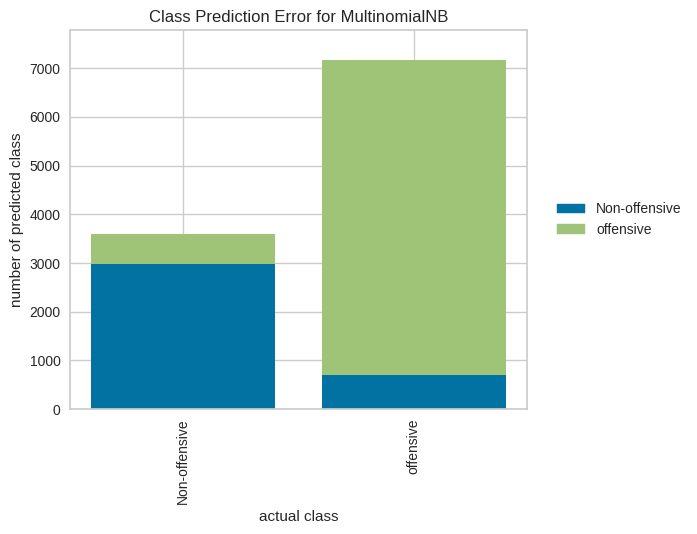

In [25]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    naive, classes=['Non-offensive','offensive'])
visualizer.fit(X_train_counts,y_train)

# Evaluate the model on the test data
visualizer.score(X_test_counts,y_test)

# Draw visualization
g = visualizer.poof()


In [26]:
from sklearn.svm import LinearSVC

svm=LinearSVC()
svm.fit(X_train_counts,y_train)
svm_score=svm.score(X_test_counts,y_test)


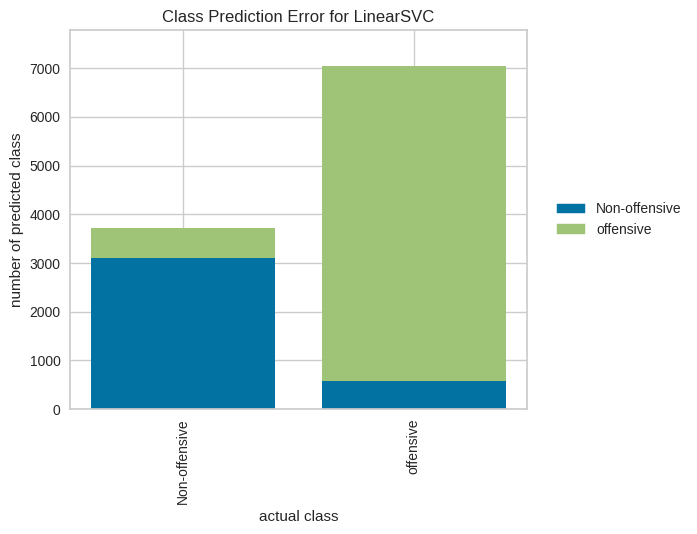

In [27]:
visualizer = ClassPredictionError(
    svm, classes=['Non-offensive','offensive'])
visualizer.fit(X_train_counts,y_train)

# Evaluate the model on the test data
visualizer.score(X_test_counts,y_test)

# Draw visualization
g = visualizer.poof()

In [28]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train_counts,y_train)
lr_score=lr.score(X_test_counts,y_test)

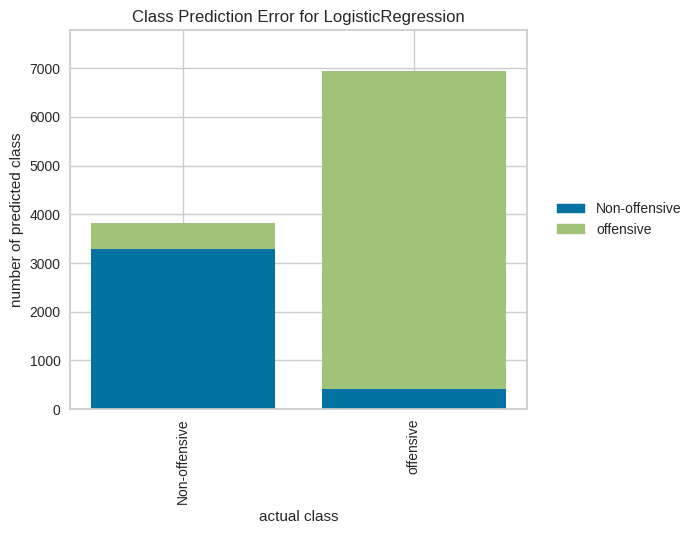

In [29]:
visualizer = ClassPredictionError(
    lr, classes=['Non-offensive','offensive'])
visualizer.fit(X_train_counts,y_train)

# Evaluate the model on the test data
visualizer.score(X_test_counts,y_test)

# Draw visualization
g = visualizer.poof()

In [30]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_counts,y_train)
xgb_score=xgb.score(X_test_counts,y_test)

In [31]:
visual_data=pd.DataFrame({'Algorithms':['Naive-Bayes','SVM','Logistic Regression','Random forest','Xgboost'],'Accuracy':[naive_score,svm_score,lr_score,rf_score,xgb_score]})
visual_data.head()


Algorithms  Accuracy
0          Naive-Bayes  0.877439
1                  SVM  0.889240
2  Logistic Regression  0.911355
3        Random forest  0.660937
4              Xgboost  0.915350

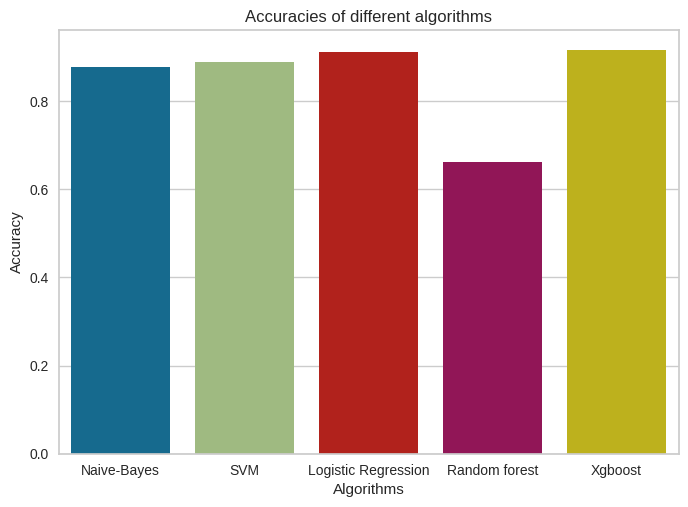

In [32]:
# sns.set_theme(style="whitegrid")
ax=ax = sns.barplot(x="Algorithms", y="Accuracy", data=visual_data)
plt.figure(1,figsize=(12,8))
plt.title('Accuracies of different algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
# plt.legend()
plt.show()

In [34]:
text='you are good' # enter your text for testing
# get the prediction for the text
text_=count_vect.transform([text])
pred=lr.predict(text_) # predicting 
prob=np.amax(lr.predict_proba(text_))#  getting probability
print(pred,prob)

[0] 0.807495256514172
